### Import necessary libraries

In [1]:
import os
import json
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pprint
from sklearn.linear_model import LinearRegression

def get_data():
    root = "data"
    for file in os.listdir(root):
        if file.endswith(".json"):
            yield json.load(open(os.path.join(root, file), "r"))

### Basic demographics

In [2]:
ls = []
for data in get_data():
    df_user = pd.DataFrame.from_dict(data["user"], orient='index').T
    ls.append(df_user)
df = pd.concat(ls)
df

,user_id,sex-group,age-group,education-group,condition
0,240506-084234-765046,male,25-34,Undergraduate Degree,10no10adex
0,240507-120718-051278,male,25-34,Undergraduate Degree,10no10adex
0,240523-140833-766938,male,25-34,Postgraduate Degree,10no10adex
0,240522-094954-798341,male,25-34,Postgraduate Degree,20ad
0,240501-174325-350209,male,18-24,Postgraduate Degree,20ad
...,...,...,...,...,...
0,240522-072012-818636,female,35-44,Postgraduate Degree,10no10adex
0,240528-093054-698617,male,25-34,Undergraduate Degree,10no10ad
0,240523-135333-178180,male,25-34,Postgraduate Degree,10no10adex
0,240515-133315-171753,male,45-54,Postgraduate Degree,20adex


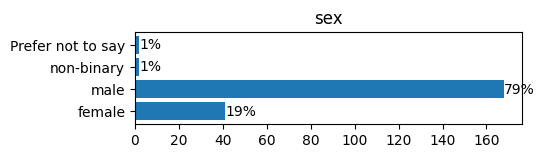

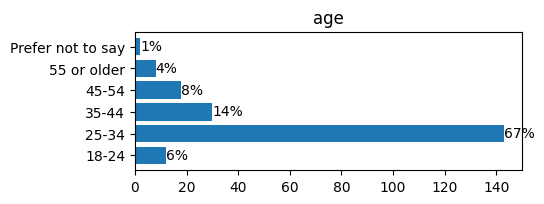

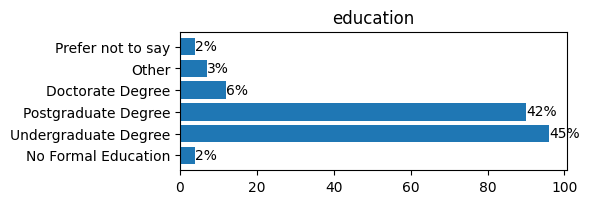

In [3]:
orders = {"sex": ["female", "male", "non-binary", "Prefer not to say"],
          "age": ["18-24", "25-34", "35-44", "45-54", "55 or older", "Prefer not to say"],
          "education": ["No Formal Education", "Undergraduate Degree", "Postgraduate Degree", "Doctorate Degree", "Other", "Prefer not to say"]}

for c in ["sex", "age", "education"]:
    vc = df[c + "-group"].value_counts().to_dict()
    fig, ax = plt.subplots(1, 1, figsize=(5, 0.3 * len(vc)))
    labels = orders[c]
    values = [vc[label] for label in labels]
    ax.barh(labels, values)
    for label, value in zip(labels, values):
        ax.text(value, label, f"{round(value / sum(values) * 100)}%", va="center")
    ax.set_title(c)
    plt.show()

/tmp/ipykernel_3472441/432872098.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + o2, rotation=20, ha="left")
/tmp/ipykernel_3472441/432872098.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + o1)
/tmp/ipykernel_3472441/432872098.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + o2, rotation=20, ha="left")
/tmp/ipykernel_3472441/432872098.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + o1)
/tmp/ipykernel_3472441/432872098.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

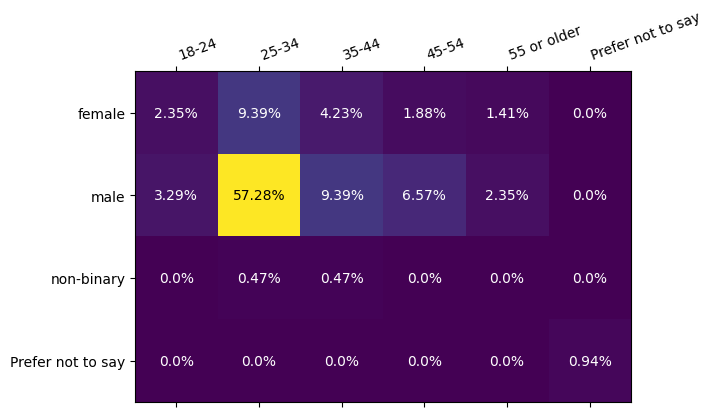

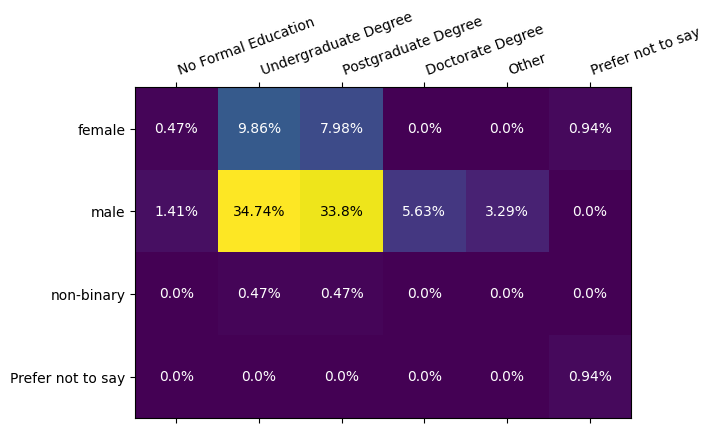

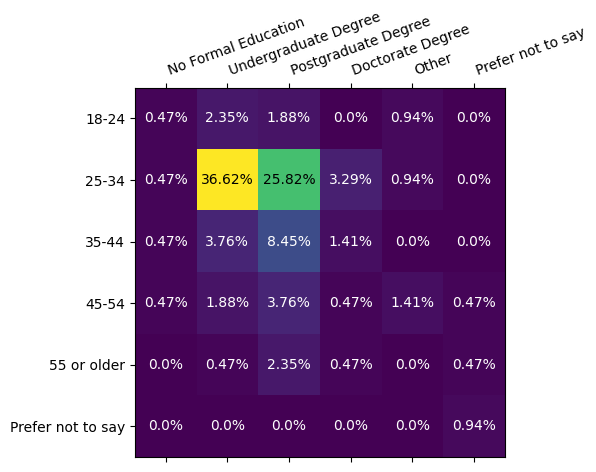

In [4]:
for c1, c2 in itertools.combinations(orders, 2):
    o1, o2 = orders[c1], orders[c2]
    vc = df[[c1 + "-group", c2 + "-group"]].value_counts().to_dict()
    mat = np.zeros((len(o1), len(o2)))
    for i1, k1 in enumerate(o1):
        for i2, k2 in enumerate(o2):
            mat[i1, i2] = vc.get((k1, k2), 0)
    fig, ax = plt.subplots()
    ax.matshow(mat)
    for (i, j), z in np.ndenumerate(mat):
        ax.text(j, i, f"{round(z / mat.sum() * 100, 2)}%", ha='center', va='center',
                color="black" if z >= 0.5 * mat.max() + 0.5 * mat.min() else "white")
    ax.set_xticklabels([''] + o2, rotation=20, ha="left")
    ax.set_yticklabels([''] + o1)

### Derive Task Complexities

In [5]:
ranks = {x: [] for x in ['Frontend-Luftklappe', 'Massekabel', 'Head-Airbag-Twist', 'Gurt-Cabrio', 'Wasserablaufschlauch', 'Tuerschliessbuegel']}

for data in get_data():
    ranking = data["ranking"]
    for i, x in enumerate(ranking):
        ranks["Massekabel" if x == "DSC_Massekabel" else x].append(i + 1)

ranks = pd.DataFrame.from_dict(ranks).describe().T[["mean", "std"]]
ranks

,mean,std
Frontend-Luftklappe,2.928910,1.731960
Massekabel,3.265403,1.672092
Head-Airbag-Twist,3.454976,1.659493
Gurt-Cabrio,3.691943,1.519675
Wasserablaufschlauch,3.620853,1.695468
Tuerschliessbuegel,4.037915,1.767022


/tmp/ipykernel_3472441/2405684265.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Dark2")


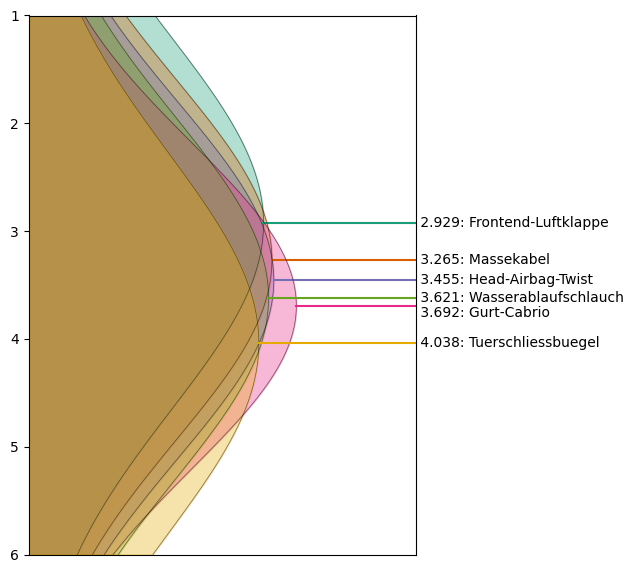

In [6]:

xx = np.linspace(1, 6, 100)


cmap = plt.cm.get_cmap("Dark2")
i = 0
plt.figure(figsize=(5, 7))
for uc, (m, s) in ranks.iterrows():
    color = cmap(i)
    yy = stats.norm.pdf(xx, m, s)
    plt.plot(yy, xx, c="black", alpha=0.5, linewidth=0.5)
    plt.fill_betweenx(xx, 0, yy, alpha=0.33, color=color)
    plt.plot([max(yy), 0.38], [m, m], c=color)
    plt.text(0.38, m, f" {round(m, 3)}: {uc}", va="center" if uc != "Gurt-Cabrio" else "top")
    i += 1
plt.xticks([])
plt.xlim(0, 0.38)
plt.ylim(1, 6)
plt.gca().invert_yaxis()
plt.show()

In [7]:
ranks["mean"] = 1 - (ranks["mean"] - ranks["mean"].min()) / (ranks["mean"].max() - ranks["mean"].min())
tcs = sorted([(uc, tc) for uc, (tc, _) in ranks.iterrows()], key=lambda t: t[1])
tcs

[('Tuerschliessbuegel', 0.0),
 ('Gurt-Cabrio', 0.3119658119658123),
 ('Wasserablaufschlauch', 0.3760683760683762),
 ('Head-Airbag-Twist', 0.5256410256410259),
 ('Massekabel', 0.6965811965811965),
 ('Frontend-Luftklappe', 1.0)]

### Time spent in each task groups

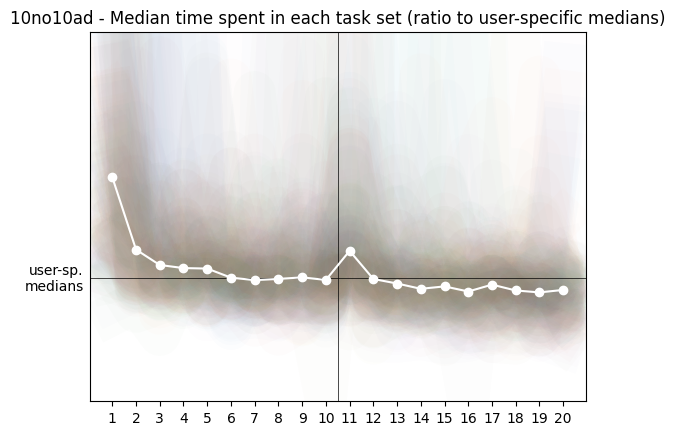

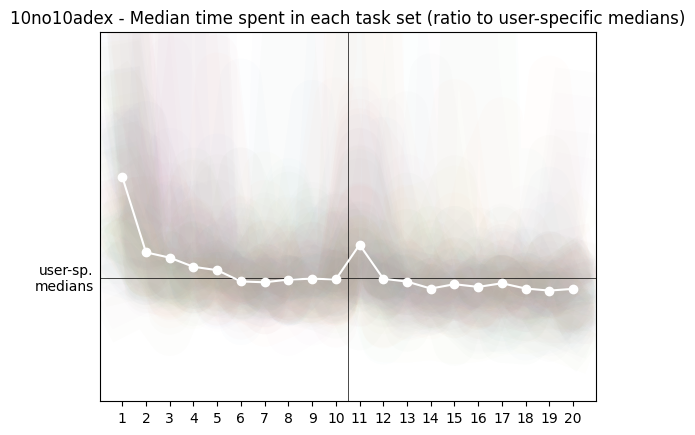

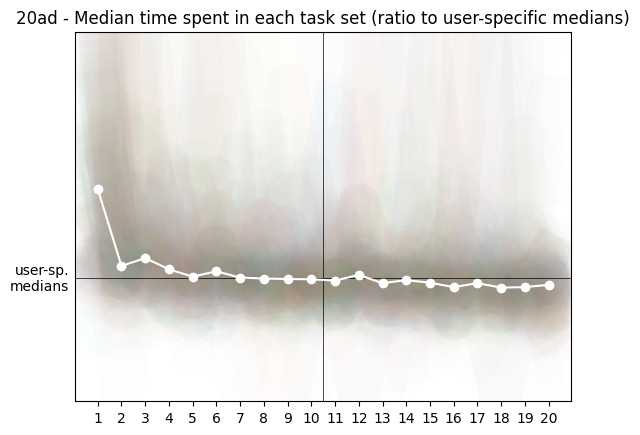

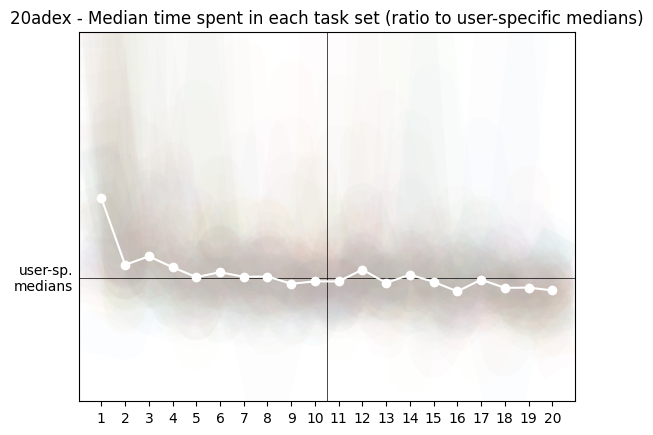

In [8]:

for tg in ["10no10ad", "10no10adex", "20ad", "20adex"]:
    ls = []
    for data in get_data():
        if data["user"]["condition"].startswith(tg):
            ls.append(data["time"])
    df = pd.DataFrame(ls)
    df = df.div(df.median(axis=1), axis=0)
    for _, row in df.iterrows():
        plt.plot(row.tolist(), linewidth=30, alpha=0.01)
    plt.plot(df.median(axis=0), c="white", marker="o", zorder=555)
    plt.ylim(0, 3)
    plt.yticks([])
    plt.xticks(range(20))
    plt.gca().set_xticklabels(range(1, 21))
    plt.axvline(9.5, c="black", linewidth=0.5)
    plt.axhline(1, c="black", linewidth=0.5)
    plt.title(f"{tg} - Median time spent in each task set (ratio to user-specific medians)")
    plt.text(-1.2, 1, "user-sp.\nmedians", va="center", ha="right")
    plt.show()

### Now make big df

In [9]:
ls = []
for data in get_data():
    df_ij = pd.DataFrame.from_records(data["summary"])
    df_user = pd.DataFrame.from_dict(data["user"], orient='index').T
    ls.append(pd.merge(df_user, df_ij, how="cross"))
df = pd.concat(ls)
df = df[["user_id", "condition", "index_i", "use_case", "file", "pics_label", "ai_advice", "is_ok_user"]].copy()
# data.insert(4, "task_complexity", data["use_case"].map(tcs))
df.rename({"index_i": "task_familiarity", "pics_label": "is_ok", "ai_advice": "a", "is_ok_user": "h"}, axis=1, inplace=True)
df["a_correct"] = df["a"] == df["is_ok"]
df["h_correct"] = df["h"] == df["is_ok"]
df

,user_id,condition,task_familiarity,use_case,file,is_ok,a,h,a_correct,h_correct
0,240506-084234-765046,10no10adex,0,Head-Airbag-Twist,WBA11AV040FT30542_Cvc9BY8BMQo0ENBQmalF,True,True,True,True,True
1,240506-084234-765046,10no10adex,0,Frontend-Luftklappe,WBA21BP01RCR55079_wuYlDI0Bsfk0sxt0exjO,False,False,True,True,False
2,240506-084234-765046,10no10adex,0,Gurt-Cabrio,WBAFY41010CR70976_QxtgVI0BMQo0ENBQ6nTy,False,True,False,False,True
3,240506-084234-765046,10no10adex,0,Wasserablaufschlauch,WBA53FJ00RCR92552_E3ffq40BWicZSVJ7mN1B,True,True,True,True,True
4,240506-084234-765046,10no10adex,0,Massekabel,WBA11BM03RCR89086_4SzzpY0Bsfk0sxt0Tx2b,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
115,240528-093831-906843,20ad,19,Head-Airbag-Twist,WBY43AW00RFT31207_wSoVCY8BWicZSVJ7M2Fb,True,True,True,True,True
116,240528-093831-906843,20ad,19,Gurt-Cabrio,WBSDZ0C0XRCR24775_WPRN8osBWicZSVJ7tLff,False,True,True,False,False
117,240528-093831-906843,20ad,19,Tuerschliessbuegel,WBA11AP00RCR46167_vc85XowBsfk0sxt0ZTdG,True,True,True,True,True
118,240528-093831-906843,20ad,19,Wasserablaufschlauch,WBY33FK03RCR83285_7zSKhI0BMQo0ENBQGeKy,False,False,False,True,True


### Reliance & Reflection

In [10]:
ls = []
index_cols = ["user_id", "use_case", "file"]
for n, g in df[df["condition"].str.startswith("10no")].groupby(index_cols):
    assert len(g) == 2
    r1 = g.iloc[0]
    r2 = g.iloc[1]
    assert r1["condition"] == r2["condition"]
    assert r1["task_familiarity"] + 10 == r2["task_familiarity"]
    assert r1["is_ok"] == r2["is_ok"]
    assert r1["a_correct"] == r2["a_correct"]
    h1, h2 = r1["h_correct"], r2["h_correct"]
    ls.append({**dict(zip(index_cols[:2], n)),
               'condition': r1["condition"],
               'task_familiarity': r1["task_familiarity"],
               'h1_correct': h1,
               'a_correct': r1['a_correct'],
               'h2_correct': h2})
df_re = pd.DataFrame.from_records(ls).sort_values(["user_id", 'task_familiarity']).reset_index(drop=True)

reliances = {(True, False, True): 'CSR',
             (True, False, False): 'IAIR',
             (False, True, True): 'CAIR',
             (False, True, False): 'ISR'}
df_re["reliance"] = df_re.apply(lambda r: reliances.get((r.h1_correct, r.a_correct, r.h2_correct), 'equal'), axis=1)
df_re

,user_id,use_case,condition,task_familiarity,h1_correct,a_correct,h2_correct,reliance
0,240502-093808-178068,Frontend-Luftklappe,10no10adex,0,False,True,True,CAIR
1,240502-093808-178068,Gurt-Cabrio,10no10adex,0,True,True,True,equal
2,240502-093808-178068,Head-Airbag-Twist,10no10adex,0,False,True,True,CAIR
3,240502-093808-178068,Massekabel,10no10adex,0,False,True,False,ISR
4,240502-093808-178068,Tuerschliessbuegel,10no10adex,0,True,True,True,equal
...,...,...,...,...,...,...,...,...
6535,240528-100853-449022,Gurt-Cabrio,10no10ad,9,True,True,True,equal
6536,240528-100853-449022,Head-Airbag-Twist,10no10ad,9,False,True,True,CAIR
6537,240528-100853-449022,Massekabel,10no10ad,9,True,True,True,equal
6538,240528-100853-449022,Tuerschliessbuegel,10no10ad,9,True,True,True,equal


In [11]:
ls = []
vc_index = ['equal', 'CSR', 'ISR', 'CAIR', 'IAIR']
vc_index_extended = ['equal', 'CSR', 'ISR', '*RSR', 'CAIR', 'IAIR', '*RAIR']
index_cols = ["condition", "use_case", "task_familiarity"]
for n, g in df_re.groupby(index_cols):
    vc = g.reliance.value_counts()
    ls.append({**dict(zip(index_cols, n)), **{k: vc.get(k, 0) / sum(vc.values) for k in vc_index}})
df_re2 = pd.DataFrame.from_records(ls)
df_re2.insert(6, "*RSR", df_re2["CSR"] / (df_re2["CSR"] + df_re2["IAIR"]))
df_re2.insert(9, "*RAIR", df_re2["CAIR"] / (df_re2["CAIR"] + df_re2["ISR"]))
df_re2

,condition,use_case,task_familiarity,equal,CSR,ISR,*RSR,CAIR,IAIR,*RAIR
0,10no10ad,Frontend-Luftklappe,0,0.540000,0.060000,0.140000,0.375000,0.160000,0.100000,0.533333
1,10no10ad,Frontend-Luftklappe,1,0.460000,0.100000,0.080000,0.416667,0.220000,0.140000,0.733333
2,10no10ad,Frontend-Luftklappe,2,0.540000,0.080000,0.140000,0.500000,0.160000,0.080000,0.533333
3,10no10ad,Frontend-Luftklappe,3,0.500000,0.060000,0.120000,0.500000,0.260000,0.060000,0.684211
4,10no10ad,Frontend-Luftklappe,4,0.520000,0.140000,0.060000,0.466667,0.120000,0.160000,0.666667
...,...,...,...,...,...,...,...,...,...,...
115,10no10adex,Wasserablaufschlauch,5,0.508475,0.050847,0.101695,0.428571,0.271186,0.067797,0.727273
116,10no10adex,Wasserablaufschlauch,6,0.694915,0.033898,0.050847,0.250000,0.118644,0.101695,0.700000
117,10no10adex,Wasserablaufschlauch,7,0.610169,0.084746,0.067797,0.500000,0.152542,0.084746,0.692308
118,10no10adex,Wasserablaufschlauch,8,0.542373,0.050847,0.101695,0.428571,0.237288,0.067797,0.700000


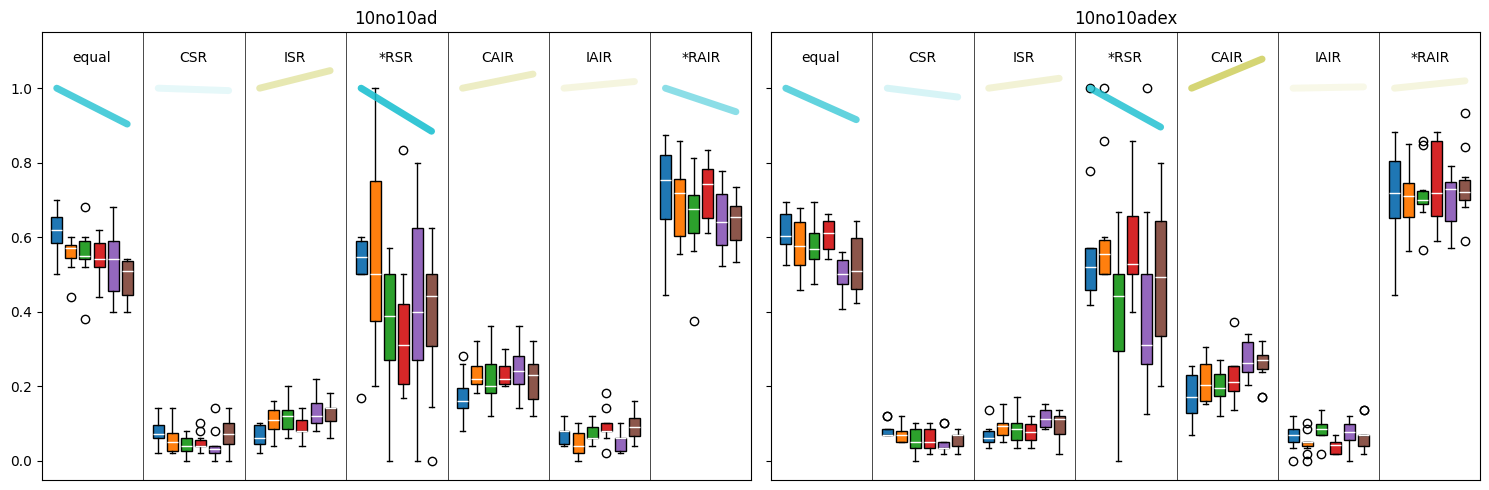

In [12]:
cmap = plt.get_cmap("tab10")
magic_number = 8 / 45

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey="row")
for (condition, df_group), ax in zip(df_re2.groupby('condition'), axes):
    for i, col in enumerate(vc_index_extended):
        data_ = [df_group[df_group["use_case"] == uc][col].tolist() for uc, _ in tcs]
        xx = np.arange(i, i + 1, 1/len(data_)) + 0.2 * i
        ax.text(xx.mean(), 1.1, col, va="top", ha="center")
        bp = ax.boxplot(data_, positions=xx, patch_artist=True, widths=0.13)
        for j, b in enumerate(bp["boxes"]):
            b.set_facecolor(cmap(j))
        for m in bp["medians"]:
            m.set_color("white")
        if i > 0:
            ax.axvline(1.2 * i - magic_number, color="black", linewidth=0.5)
        # else:
        #     ax.legend(bp["boxes"], [uc for uc, _ in tcs], bbox_to_anchor=(1, 0.975), loc="upper right")
        # Fit a line
        coef, = LinearRegression().fit([[tc] for _, tc in tcs for _ in range(10)], [x_ for xx_ in data_ for x_ in xx_]).coef_
        ax.plot([xx[0], xx[-1]], [1, 1 + coef * (xx[-1] - xx[0])], color=cmap(8) if coef > 0 else cmap(9), linewidth=5, alpha=1 - 0.9 * np.exp(-100 * coef ** 2), solid_capstyle='round')
    ax.set_ylim(None, 1.15)
    ax.set_xlim(-magic_number, xx.max() + magic_number)
    ax.set_title(f"{condition}")
    ax.set_xticks([])
fig.tight_layout()
plt.show()

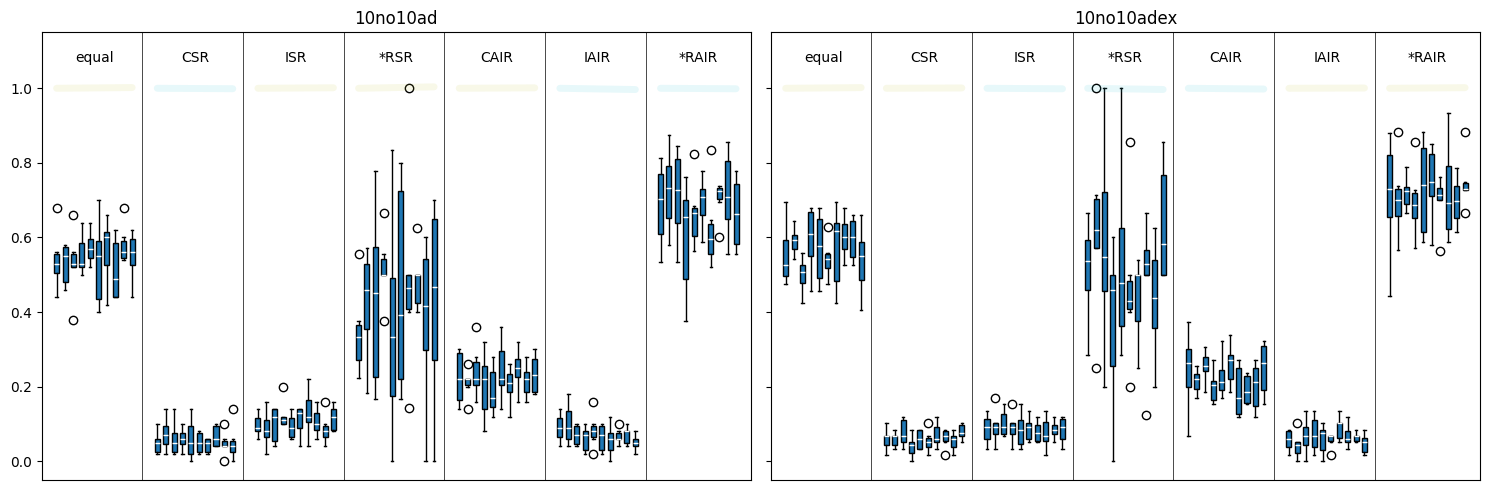

In [13]:
cmap = plt.get_cmap("tab10")
magic_number = 8 / 45

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey="row")
for (condition, df_group), ax in zip(df_re2.groupby('condition'), axes):
    for i, col in enumerate(vc_index_extended):
        data_ = [df_group[df_group["task_familiarity"] == tf][col].tolist() for tf in range(10)]
        xx = np.arange(i, i + 1, 1/len(data_)) + 0.2 * i
        ax.text(xx.mean(), 1.1, col, va="top", ha="center")
        bp = ax.boxplot(data_, positions=xx, patch_artist=True, widths=0.06)
        for m in bp["medians"]:
            m.set_color("white")
        if i > 0:
            ax.axvline(1.2 * i - magic_number, color="black", linewidth=0.5)
        # Fit a line
        coef, = LinearRegression().fit([[tf] for tf in range(10) for _ in range(6)], [x_ for xx_ in data_ for x_ in xx_]).coef_
        ax.plot([xx[0], xx[-1]], [1, 1 + coef * (xx[-1] - xx[0])], color=cmap(8) if coef > 0 else cmap(9), linewidth=5, alpha=1 - 0.9 * np.exp(-100 * coef ** 2), solid_capstyle='round')
    ax.set_ylim(None, 1.15)
    ax.set_xlim(-magic_number, xx.max() + magic_number)
    ax.set_title(f"{condition}")
    ax.set_xticks([])
fig.tight_layout()
plt.show()